In [81]:
# http://www.gutenberg.org/cache/epub/730/pg730.txt
oliver_twist = open("oliver-twist.txt", "r").read()
print (oliver_twist[:64])

text = oliver_twist

The Project Gutenberg eBook of Oliver Twist, by Charles Dickens



In [83]:
import string

# turn a doc into clean tokens
def clean_doc(doc):
    # replace '--' with a space ' '
    doc = doc.replace('--', ' ')
    # split into tokens by white space
    tokens = doc.split()
    # remove punctuation from each token
    tokens = [' ' if w in string.punctuation else w for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # make lower case
    tokens = [word.lower() for word in tokens]
    return tokens
 
tokens = clean_doc(text)

number_of_unique_tokens = len(set(tokens))

print('Total Tokens: %d' % len(tokens))
print('Unique Tokens: %d' % number_of_unique_tokens)
print('These are the first 200 tokens: %s' % tokens[:200])



sequence_length = 2

# organize into sequences of tokens of input words plus one output word
length = sequence_length + 1
sequences = list()
for i in range(length, len(tokens)):
    # select sequence of tokens
    seq = tokens[i-length:i]
    # convert into a line
    line = ' '.join(seq)
    # store
    sequences.append(line)

print ('Total Sequences: %d' % len(sequences))
print ('This is the first sequence: {0}'.format(sequences[0]))

Total Tokens: 123933
Unique Tokens: 8526
These are the first 200 tokens: ['the', 'project', 'gutenberg', 'ebook', 'of', 'oliver', 'by', 'charles', 'dickens', 'this', 'ebook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'in', 'the', 'united', 'states', 'and', 'most', 'other', 'parts', 'of', 'the', 'world', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictions', 'you', 'may', 'copy', 'give', 'it', 'away', 'or', 'it', 'under', 'the', 'terms', 'of', 'the', 'project', 'gutenberg', 'license', 'included', 'with', 'this', 'ebook', 'or', 'online', 'at', 'if', 'you', 'are', 'not', 'located', 'in', 'the', 'united', 'you', 'will', 'have', 'to', 'check', 'the', 'laws', 'of', 'the', 'country', 'where', 'you', 'are', 'located', 'before', 'using', 'this', 'oliver', 'twist', 'charles', 'dickens', 'release', 'recently', 'june', 'english', 'produced', 'peggy', 'gaugy', 'and', 'leigh', 'html', 'version', 'by', 'al', 'start', 'of', 'the', 'project', 'gutenberg', 'ebook', 'oliver', 'tw

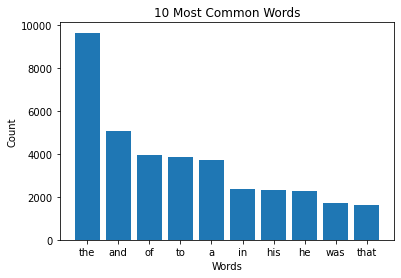

In [92]:
from collections import Counter
import matplotlib.pyplot as plt

# get the 10 most common words
common_words = Counter(tokens).most_common(10)

# extract the words and count
words = [word for word, count in common_words]
counts = [count for word, count in common_words]

# create the bar chart
plt.bar(words, counts)
plt.xlabel("Words")
plt.ylabel("Count")
plt.title("10 Most Common Words")

# show the chart
plt.show()

In [13]:
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from tensorflow.keras.optimizers import Adam
 
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sequences)
sequences = tokenizer.texts_to_sequences(sequences)
# vocab_size = len(tokenizer.word_index) + 1
vocab_size = number_of_unique_tokens + 1
 
sequences0 = np.array(sequences)
X, y = sequences0[:,:-1], sequences0[:,-1]
y = to_categorical(y, num_classes=vocab_size)


dimensions_to_represent_word = 100
 
model = Sequential()
model.add(Embedding(vocab_size, sequence_length, input_length=sequence_length))

model.add(LSTM(500, return_sequences=True))
model.add(LSTM(500))
model.add(Dense(500, activation='relu'))
model.add(Dense(vocab_size, activation='softmax'))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 2, 2)              17054     
                                                                 
 lstm_2 (LSTM)               (None, 2, 500)            1006000   
                                                                 
 lstm_3 (LSTM)               (None, 500)               2002000   
                                                                 
 dense_2 (Dense)             (None, 500)               250500    
                                                                 
 dense_3 (Dense)             (None, 8527)              4272027   
                                                                 
Total params: 7,547,581
Trainable params: 7,547,581
Non-trainable params: 0
_________________________________________________________________
None


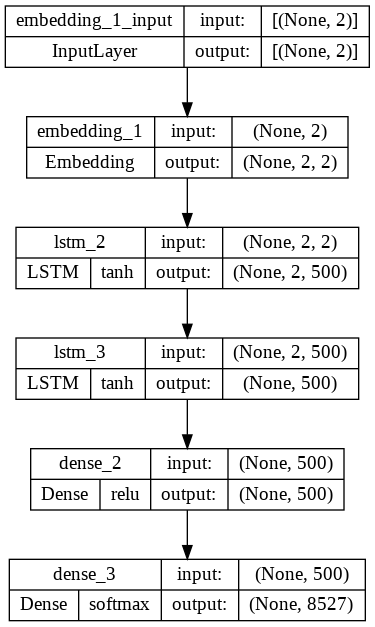

In [14]:
from tensorflow import keras
from keras.utils.vis_utils import plot_model

keras.utils.plot_model(model, to_file='model.png', show_layer_names=True, show_layer_activations=True, show_shapes=True)

In [15]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import TensorBoard

checkpoint = ModelCheckpoint("model.h5", monitor='loss', verbose=1,
    save_best_only=True, mode='auto')

# reduce = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=3, min_lr=0.0001, verbose = 1)

logdir='logsnextword1'
tensorboard_Visualization = TensorBoard(log_dir=logdir)

In [16]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001))
history = model.fit(X, y, batch_size=128, epochs=100, callbacks=[checkpoint, tensorboard_Visualization]).history

Epoch 1/100
966/969 [============================>.] - ETA: 0s - loss: 6.3572
Epoch 1: loss improved from inf to 6.35674, saving model to model.h5
969/969 [==============================] - 13s 11ms/step - loss: 6.3567
Epoch 2/100
964/969 [============================>.] - ETA: 0s - loss: 6.0127
Epoch 2: loss improved from 6.35674 to 6.01218, saving model to model.h5
969/969 [==============================] - 10s 11ms/step - loss: 6.0122
Epoch 3/100
968/969 [============================>.] - ETA: 0s - loss: 5.7644
Epoch 3: loss improved from 6.01218 to 5.76435, saving model to model.h5
969/969 [==============================] - 10s 10ms/step - loss: 5.7644
Epoch 4/100
967/969 [============================>.] - ETA: 0s - loss: 5.5893
Epoch 4: loss improved from 5.76435 to 5.58866, saving model to model.h5
969/969 [==============================] - 10s 10ms/step - loss: 5.5887
Epoch 5/100
965/969 [============================>.] - ETA: 0s - loss: 5.4589
Epoch 5: loss improved from 5.5886

Text(0.5, 0, 'epoch')

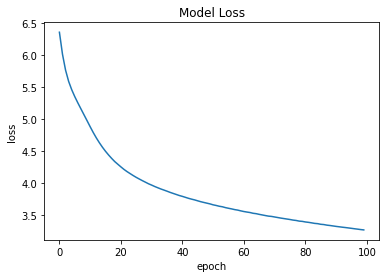

In [17]:
import matplotlib.pyplot as plt

plt.plot(history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')

In [18]:
print (X.shape)
prediction = model.predict(X[0].reshape(1,sequence_length))
print (prediction.shape)
print (prediction)

(123930, 2)
1/1 [==============================] - 1s 1s/step
(1, 8527)
[[3.0347596e-07 3.2987655e-03 3.1322283e-03 ... 4.0446868e-19
  4.0686498e-08 1.8552286e-12]]


In [46]:
#Short text
test = ['there',
'i didn’t know it',
'when there was',
'more than',
'it cannot',
'is that a',
'although this',
'do you',
'I was just',
'do you think he was',
'a great']

for t in test:
    example = tokenizer.texts_to_sequences([t])
    prediction = model.predict(np.array(example))
    predicted_word = np.argmax(prediction)
    reverse_word_map = dict(map(reversed, tokenizer.word_index.items()))  
    print ("{0} -> {1}".format(t, reverse_word_map[predicted_word]))

1/1 [==============================] - 0s 20ms/step
there -> were
1/1 [==============================] - 0s 20ms/step
i didn’t know it -> were
1/1 [==============================] - 0s 28ms/step
when there was -> great
1/1 [==============================] - 0s 31ms/step
more than -> the
1/1 [==============================] - 0s 30ms/step
it cannot -> be
1/1 [==============================] - 0s 47ms/step
is that a -> week
1/1 [==============================] - 0s 49ms/step
although this -> invitation
1/1 [==============================] - 0s 32ms/step
do you -> mean
1/1 [==============================] - 0s 28ms/step
I was just -> behind
1/1 [==============================] - 0s 27ms/step
do you think he was -> the
1/1 [==============================] - 0s 26ms/step
a great -> deal


In [80]:
#Long text
test = ['he is right there by the',
'i didn’t know it was my',
'yesterday i was walking and i saw',
'i cannot believe that he is',
'i am sure that woman is',
'is that a ring around your',
'he is such a beautiful',
'do you think you can just do',
'do you actually think you are',
'he felt a chill down his',
'i am the smartest person in']

for t in test:
    example = tokenizer.texts_to_sequences([t])
    prediction = model.predict(np.array(example))
    predicted_word = np.argmax(prediction)
    reverse_word_map = dict(map(reversed, tokenizer.word_index.items()))  
    print ("{0} -> {1}".format(t, reverse_word_map[predicted_word]))

1/1 [==============================] - 0s 22ms/step
he is right there by the -> at
1/1 [==============================] - 0s 17ms/step
i didn’t know it was my -> he
1/1 [==============================] - 0s 19ms/step
yesterday i was walking and i saw -> the
1/1 [==============================] - 0s 16ms/step
i cannot believe that he is -> from
1/1 [==============================] - 0s 20ms/step
i am sure that woman is -> said
1/1 [==============================] - 0s 18ms/step
is that a ring around your -> the
1/1 [==============================] - 0s 27ms/step
he is such a beautiful -> the
1/1 [==============================] - 0s 19ms/step
do you think you can just do -> the
1/1 [==============================] - 0s 19ms/step
do you actually think you are -> a
1/1 [==============================] - 0s 18ms/step
he felt a chill down his -> the
1/1 [==============================] - 0s 21ms/step
i am the smartest person in -> the


In [47]:
test = []
test.append(input())

for t in test:
    example = tokenizer.texts_to_sequences([t])
    prediction = model.predict(np.array(example))
    predicted_word = np.argmax(prediction)
    reverse_word_map = dict(map(reversed, tokenizer.word_index.items()))  
    print ("{0} -> {1}".format(t, reverse_word_map[predicted_word]))

do you think he was the man who
1/1 [==============================] - 0s 20ms/step
do you think he was the man who -> it
